# Game of Life

According to Wikipedia's article: "The Game of Life, also known simply as Life, is a cellular automation devised by the British mathematician John Horton Conway in 1970."

The board is made up of a $m \times n$ grid of cells, where each cell has an initial state: __live__ (represented by a $1$) or __dead__ (represented by a $0$). Each cell interacts with its eight neighbors (horizontal, vertical, diagonal) using the following four rules (taken from the above Wikipedia article):

- Any live cell with fewer than two live neighbors dies as if caused by under-population.

- Any live cell with two or three live neighbors lives on to the next generation.

- Any live cell with more than three live neighbors dies, as if by over-population.

- Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction. 

The next state of the board is determined by applying the above rules __simultaneously__ to every cell in the current state of the $m \times n$ grid board. In this process, births and deaths occur simultaneously. 

Given the current state of the board, __update__ the board to reflect its next state. 

Note that you do not need to return anything. 

## Example 1:

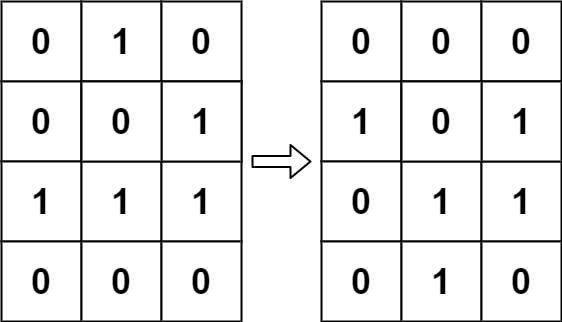

```
Input: board = [[0,1,0],[0,0,1],[1,1,1],[0,0,0]]
Output: [[0,0,0],[1,0,1],[0,1,1],[0,1,0]]
```

## Example 2:

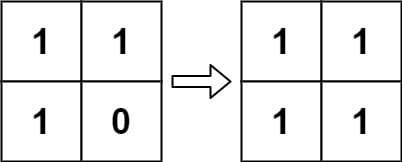

```
Input: board = [[1,1],[1,0]]
Output: [[1,1],[1,1]]
```

## My Solution

In [14]:
import copy

def game_of_life(initial_state: list[list[int]]) -> list[list[int]]:

    # For each cell check its neighbors cells and check how many live and dead cells there are
    def count_live_dead_cells(initial_state, r, c):
        live_cell_count = 0
        dead_cell_count = 0
        for i in range(-1, 2):
            for j in range(-1, 2):
                # If it is the same cell, skip it
                if (i == 0 and j == 0):
                    continue
                # Check the neighbors
                if (r + i >= 0 and c + j >= 0) and (r + i < len(initial_state) and c + j < len(initial_state[r])):
                    # If the cell is alive
                    if initial_state[r + i][c + j] == 1:
                        live_cell_count += 1
                    else:
                        dead_cell_count += 1
        return live_cell_count, dead_cell_count

    # Create a deep copy of the initial state matrix
    next_state = copy.deepcopy(initial_state)
    # Loop through all the cell of the initial state matrix
    for r in range(len(initial_state)):
        for c in range(len(initial_state[r])):
            # For each cell check its neighbors cells and check how many live and dead cells there are. 
            live_cell_count, dead_cell_count = count_live_dead_cells(initial_state, r, c)
            
            # Once count how many cells are live and how many are dead, decide the next value of the current cell
            # - A Live cell
            if initial_state[r][c] == 1:
                # - With fewer than two live neighbors the cell dies as if caused by under-population
                if live_cell_count < 2:
                    # The cell dies
                    next_state[r][c] = 0
                # - With two or three live neighbors the cell lives on to the next generation
                if live_cell_count == 2 or live_cell_count == 3:
                    continue
                # With more than three live neighbors the cell dies, as if by over-population
                if live_cell_count > 3:
                    next_state[r][c] = 0
            else:
                # - Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction
                if live_cell_count == 3:
                    next_state[r][c] = 1

    return next_state


initial_state = [
    [0,1,0],
    [0,0,1],
    [1,1,1],
    [0,0,0]
]

print(game_of_life(initial_state))

initial_state = [
    [1,1],
    [1,0],
]

print(game_of_life(initial_state))


[[0, 0, 0], [1, 0, 1], [0, 1, 1], [0, 1, 0]]
[[1, 1], [1, 1]]


## Solution

To solve the Game of Life problem, we'll use an in-place modification technique that allows us to track both the current and the next state of each cell simultaneously.

We'll introduce two new states to represent the transition:

- 2 represents a cell that was 0 and will become 1

- -1 represents a cell that was 1 and will become 0

This approach allows us to modify the board while preserving the original information needed to determine neighboring cell states.

The algorithm works as follows:

1. Check each cell's neighbors

2. Apply the Game of Life rules

3. Convert the temporary states back to 0 and 1

Time complexity is $O(m \cdot n)$ where $m$ and $n$ are the board dimensions. 

Space complexity is $O(1)$ as we modify the board in-place.

In [13]:
def game_of_life(board):
    m, n = len(board), len(board[0])

    # Directions for checking 8 neighbors
    directions = [
        (0, 1), (0, -1), (1, 0), (-1, 0),
        (1, 1), (1, -1), (-1, 1), (-1, -1)
    ]

    # Count live neighbors for a cell
    def count_live_neighbors(row, col):
        live_count = 0
        for dx, dy in directions:
            new_row, new_col = row + dx, col + dy

            # Check if neighbor is within board
            if (0 <= new_row < m and 0 <= new_col < n):
                # Count original live cells and cells transitioning to dead
                if board[new_row][new_col] == 1 or board[new_row][new_col] == -1:
                    live_count += 1
        
        return live_count

    # First pass: mark cells for transition
    for i in range(m):
        for j in range(n):
            live_neighbors = count_live_neighbors(i, j)

            # Live cell rules
            if board[i][j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    board[i][j] = -1    # Will die
            
            # Dead cell rules
            else:
                if live_neighbors == 3:
                    board[i][j] = 2     # Will become alive

    # Second pass: convert temporary states back to 0 and 1
    for i in range(m):
        for j in range(n):
            if board[i][j] == 2:
                board[i][j] = 1
            elif board[i][j] == -1:
                board[i][j] = 0

    return board



initial_state = [
    [0,1,0],
    [0,0,1],
    [1,1,1],
    [0,0,0]
]

print(game_of_life(initial_state))

initial_state = [
    [1,1],
    [1,0],
]

print(game_of_life(initial_state))

[[0, 0, 0], [1, 0, 1], [0, 1, 1], [0, 1, 0]]
[[1, 1], [1, 1]]
